
# Komputasi Eksplorasi dengan Python

*Oleh Mark Bakker, TU Delft Belanda.*

*Versi Indonesia disesuaikan oleh Tim ITB dan Tim ITS.*

## Notebook Statistik 1: Variabel Diskrit Acak

*Notebook* ini adalah yang pertama dengan aplikasi program Python dalam bidang probabilitas dan stastitik. Banyak fungsi yang akan kita gunakan di sini termasuk ke dalam subpaket `random` dari `numpy`. Kita akan mengimpor paket tersebut dan menyebutnya `rnd` sehingga kita tidak perlu mengetik `np.random.` sepanjang waktu.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

###Nomor Acak

Pembuat nomor acak, atau *random number generator*, mengajak Anda menggambarkan, secara acak, angka tertentu dari distribusi spesifik. Beberapa nomor kasus yang acak sudah termasuk ke dalam paket `random`. Sebagai contoh, fungsi `random_integers(low,high,size)` mengembalikan array bilangan bulat dari bentuk `size` secara acak dari nilai terendah atau `low` sampai dengan tertinggi atau `high`. Sebagai contoh, marilah kita membalikkan sebuah koin sebanyak 10 kali dan tetapkan nilai 0 sebagai kepala dan 1 sebagai ekor.

In [2]:
rnd.random_integers(0,1,10)

C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  if __name__ == '__main__':


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

Jika kita memanggil fungsi `random_integers` lagi, kita akan mendapatkan urutan yang berbeda dari kepala (0) dan ekor (1):

In [3]:
rnd.random_integers(0,1,10)

C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  if __name__ == '__main__':


array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1])

Secara internal, pembuat nomor acak memulainya dengan apa yang disebut benih atau *seed*. *Seed* adalah sebuah nilai yang dihasilkan otomatis (dan seharusnya acak) ketika Anda memanggil pembuat nomor acak. Nilai *seed* benar-benar mendefinisikan urutan nomor-nomor acak yang Anda dapatkan (sebagian orang dapat memperdebatkan bahwa urutan yang dibuat bersifat acak-semu atau *pseudo-random*, dan Anda mungkin tidak ingin lagi menggunakan urutannya untuk penggunaan kriptografik serius tapi untuk keperluan kita hari ini, angka-angka tersebut sudah cukup acak). Sebagai contoh, marilah atur `seed` sedemikian sehingga sama dengan 10.

In [4]:
rnd.seed(10)
rnd.random_integers(0,1,10)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

Jika kita memperinci *seed* lagi sebagai 10, kita dapat membuat lagi urutan yang sama persis.

In [5]:
rnd.seed(10)
rnd.random_integers(0,1,10)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

Kemampuan menghasilkan urutan yang sama persis sangat berguna selama pembuatan kode. Dengan menggunakan *seed* untuk pembuat nomor acak, Anda dapat membandingkan hasil/*output* Anda dengan orang lain yang juga sedang mencoba menyelesaikan persoalan yang sama.

###Membalikkan koin

Cukuplah dahulu saat ini mengenai pembuat nomor acak. Marilah kita membalikkan koin sebanyak 100 kali dan hitunglah jumlah kepala (semua yang bernilai 0) dan jumlah ekor (semua yang bernilai 1):

In [4]:
flip = rnd.random_integers(0,1,100)
hitungkepala = 0
hitungekor = 0
for i in range(100):
    if flip[i] == 0:
        hitungkepala += 1
    else:
        hitungekor += 1
print('Jumlah kepala: ',hitungkepala)
print('Jumlah ekor: ',hitungekor)

Jumlah kepala:  52
Jumlah ekor:  48


C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  if __name__ == '__main__':


Pertama-tama, perhatikan bahwa jumlah kepala dan jumlah ekor bernilai sampai dengan 100. Lebih jauh lagi, perhatikan bagaimana cara kita menghitung kepala dan ekor. Kita membuat penghitung `hitungkepala` dan `hitungekor`, dibuat loop melalui seluruh pembalikan, dan ditambahkan 1 nilai untuk proses penghitungan yang tepat. Selain dengan loop, kita juga dapat menggunakan kondisi dari indeks/pengenal yang digabungkan dengan hasil penjumlahan, sebagai berikut:

In [26]:
hitungkepala = np.sum( flip == 0 )
hitungekor = np.sum( flip == 1 )
print('hitungkepala ', hitungkepala)
print('hitungekor ', hitungekor)

hitungkepala  43
hitungekor  57


Bagaimana cara kerjanya? Anda dapat mengingat kembali pernyataan `flip == 0` yang mengembalikan array dengan panjang 100 (sama dengan panjang `flip`) dengan nilai benar atau `True` saat kondisi awal terpenuhi,b dan salah atau `False` jika kondisi tidak terpenuhi. Data `True` bertipe boolean mempunyai nilai 1, dan data boolean `False` bernilai 0. Jadi, ketika kita menjumlahkan seluruh nilai dalam array `flip == 0`, kita menjumlahkan seluruh  nilai `True`, di mana setiap nilai `True` sama dengan 1.

Kode di atas terbilang mudah, tetapi jika kita melakukan eksperimen dengan lebih dari dua hasil, kode tersebut akan menjadi tidak efektif untuk menjumlahkan setiap hasil yang memungkinkan. Oleh karena itu, marilah mencoba menulis ulang kode bagian ini dengan menggunakan loop. Dalam kasus spesifik ini, jumlah baris dalam kode tidak berkurang, tetapi saat kita memiliki eksperimen dengan berbagai hasil berbeda, hasilnya akan jauh lebih efisien.

In [20]:
hasil = np.zeros(2) # Dua hasil. Kepala disimpan dalam  hasil[0], ekor dalam hasil[1]
for i in range (2):
    hasil[i] = np.sum( flip == i )
    print('hasil ',i,' adalah ',hasil[i])

hasil  0  adalah  52.0
hasil  1  adalah  48.0


###Latihan 1. <a name="back1"></a>Melemparkan dadu

Lemparlah sebuah dadu sebanyak 100 kali dan catatlah berapa kali Anda melemparkan 1, 2, 3, 4, 5, dan 6
Throw a dice 100 times and report how many times you throw 1, 2, 3, 4, 5, and 6. Gunakanlah *seed* 33. Pastikanlah bahwa nilai yang tercatat dapat ditambahkan sampai dengan 100. Pastikanlah juga bahwa Anda menggunakan loop di dalam kode Anda seperti apa yang telah kita lakukan dalam sel kode sebelumnya.

In [38]:
N=100
rnd.seed(33)
dadu=rnd.random_integers(1,6,N)
print(dadu)
hasil=np.zeros(6)
for i in range(6):
    hasil[i]=np.sum(dadu==i+1)
    print ('hasil ',i+1,' adalah ',hasil[i])
    

[5 1 3 3 2 2 4 6 4 5 3 6 4 2 6 5 3 5 4 1 1 3 1 5 1 1 4 2 4 4 3 4 3 2 5 4 4
 4 2 3 1 1 5 5 2 3 6 3 4 5 2 2 5 2 4 2 5 1 3 5 1 5 4 5 4 6 3 1 1 2 6 3 2 5
 2 2 4 4 4 6 4 4 3 4 1 4 4 1 1 2 5 1 5 5 4 3 5 1 6 2]
hasil  1  adalah  17.0
hasil  2  adalah  17.0
hasil  3  adalah  15.0
hasil  4  adalah  24.0
hasil  5  adalah  19.0
hasil  6  adalah  8.0


C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  app.launch_new_instance()


<a href="#ex1answer">Kunci Jawaban Latihan 1</a>

###Membalikkan koin dua kali

Selanjutnya, kita akan membalikkan koin sebanyak dua kali dalam 100 kali percobaan dan menghitung jumlah ekor yang didapatkan. Kita buat array acak dari nilai-nilai 0 (kepala) dan nilai-nilai 1 (ekor) dengan dua baris (merepresentasikan pembalikan dua koin) dan 100 kolom. Penjumlahan sepanjang dua baris tersebut merepresentasikan jumlah ekor. Fungsi `sum` mengambil sebuah array dan pada dasarnya/*default* menjumlahkan seluruh nilai di dalam array tersebut serta mengembalikan sebuah angka. Dalam kasus ini, kita ingin menjumlahkan baris-baris tersebut. Untuk itu, fungsi `sum` memiliki argumen kata kunci yang disebut `axis`, di mana `axis=0` menjumlahkan nilai-nilai dalam array (seluruh baris) melalui indeks 0, `axis=1` menjumlahkan nilai-nilai dalam array melalui indeks 1 (seluruh kolom), dsb.

In [39]:
rnd.seed(55)
flips = rnd.random_integers(low=0, high=1, size=(2,100))
ekor = np.sum(flips, axis=0)
jumlah_ekor = np.zeros(3)
for i in range(3):
    jumlah_ekor[i] = np.sum( ekor == i )
print('nilai 0, 1, 2 ekor:',hitungekor)

nilai 0, 1, 2 ekor: 48


C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  from ipykernel import kernelapp as app


Cara lain untuk membuat simulasi pembalikan koin dua kali adalah dengan mengundi sebuah nilai secara acak dari sebuah set dengan 2 angka (0 dan 1). Tentu saja, Anda perlu mengganti angka setiap selesai pengundian. Fungsi `numpy` untuk pengundian angka secara acak dari sebuah array yang diberikan disebut `choice`. Fungsi `choice` memiliki kata kunci untuk menentukan apakah nilai-nilai tersebut tergantikan atau tidak. Dengan demikian, dua cara di bawah ini identik untuk membuat 5 kali pembalikan.

In [40]:
rnd.seed(55)
flips1 = rnd.random_integers(low=0, high=1, size=5)
rnd.seed(55)
flips2 = rnd.choice(list(range(2)), size=5, replace=True)
np.alltrue(flips1==flips2)  # Periksalah apakah seluruh nilai dalam kedua array bernilai sama.

C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  from ipykernel import kernelapp as app


True

###Probabilitas Kumulatif

Selanjutnya, kita menghitung probabilitas eksperimental dari keadaan di mana terdapat 0 ekor, 1 ekor, dan 2 ekor sepanjang pembagian oleh jumlah total percobaan (satu kali percobaan berarti dua kali pembalikan koin). Ketiga probabilitas dijumlahkan sampai dengan 1. Distribusi probabilitas kumulatif dihasilkan dengan menjumlahkan secara kumulatif probabilitas dengan menggunakan fungsi `cumsum` dari `numpy`. Nilai pertama adalah probabilitas terlemparkannya kondisi 0 ekor. Nilai kedua adalah probabilitas dari kondisi di mana terdapat 1 ekor atau kurang dari itu, dan nilai ketiga adalah probabilitas dari kondisi di mana terdapat 2 ekor atau kurang dari itu tetapi tetap lebih dari 1 ekor. Probabilitas tersebut dihitung sebagai jumlah ekor dibagi dengan jumlah total percobaan, dan karena `jumlah_ekor` mendapatkan nilai real (bukan bilangan bulat), kita dapat membagina dengan bilangan bulat 100 dan mendapatkan probabilitas yang tepat.

In [41]:
prob = jumlah_ekor / 100
cum_prob = np.cumsum(prob) # So cum_prob[0] = prob[0], cum_prob[1] = prob[0] + prob[1], dll.
print('cum_prob ',cum_prob)

cum_prob  [ 0.27  0.74  1.  ]


Distribusi probabilitas kumulatif 

Distribusi probabilitas kumulatif dari sebuah dataset umumnya diplot melalui fungsi langkah atau *step*, yang dapat dilakukan dengan cara menetapkan kata kunci `drawstyle='steps-post'` ketika menggunakan fungsi plot. Untuk membuat plot tersebut terlihat indah, kita perlu memberikan sebuah nilai tambah dari 0 di awal array dan sebuah nilai tambah yang lain lagi dari 1 di akhir array. Untuk itu, kita gunakan perintah `hstack`, di mana fungsi tersebut menumpukkan nilai-nilai atau array-array sekaligus, yang satu di belakang yang lain. Perhatikan bahwa nilai atau array yang perlu ditumpuk bersama sudah dikelompokkan ke dalam sebuah tupel (dengan cara menaruh tanda kurung di antaranya). Terakhir, batas sumbu vertikal diperpanjang sedikit agar grafiknya terlihat lebih indah.

(-0.1, 1.1)

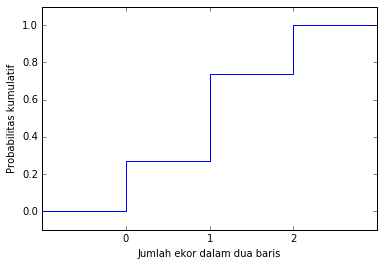

In [42]:
y = np.hstack((0,cum_prob,1))
plt.plot([-1,0,1,2,3],y,drawstyle='steps-post')
plt.xlabel('Jumlah ekor dalam dua baris')
plt.ylabel('Probabilitas kumulatif')
plt.xticks([0,1,2])
plt.ylim(-0.1,1.1)

###Latihan 2. <a name="back2"></a>Membalikkan koin sebanyak lima kali

Balikkan koin sebanyak 5 kali dalam satu putaran dan catatlah seberapa sering Anda mendapatkan kepala (bervariasi antara 0-5). Lakukan percobaan tersebut sebanyak 1000 kali. Buatlah grafik dengan menampilkan jumlah total kepala pada sumbu horizontal dan perhitungan probabilitas secara empiris untuk mendapatkan kepala dalam jumlah tersebut pada sumbu vertikal. Jalankan kode Anda beberapa kali (tekan [shift]-[enter]) dan lihatlah bahwa grafik tersebut berubah sedikit demi sedikit sepanjang waktu, sama halnya dengan urutan nomor acak berubah dari waktu ke waktu.

C:\Users\mbagu\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  from ipykernel import kernelapp as app


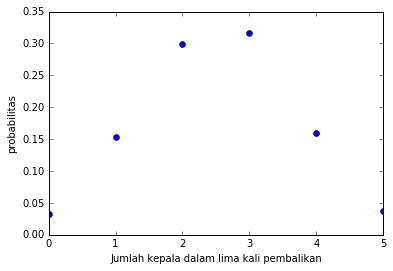

In [46]:
N = 1000
heads = -np.sum( rnd.random_integers(0,1,(5,1000))-1, axis=0 ) # Atau sebut saja ekor = 0 dan kepala = 1
countheads = np.zeros(6)
for i in range(6):
    countheads[i] = sum(heads==i)
plt.plot( list(range(0,6)), countheads/N, 'bo' )
plt.xlabel('Jumlah kepala dalam lima kali pembalikan')
plt.ylabel('probabilitas')

Hitunglah probabilitas kumulatifnya. Tampilkan nilai pada layar dan buatlah plot dari fungsi probabilitas kumulatif tersebut dengan menggunakan grafik langkah atau *step graph*.

cum_prob  [ 0.033  0.187  0.486  0.803  0.962  1.   ]


(-0.1, 1.1)

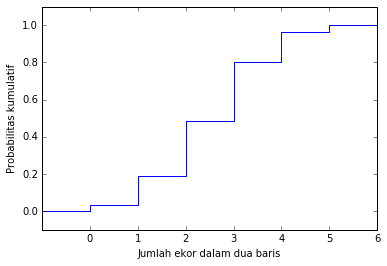

In [52]:
prob = countheads /N
cum_prob = np.cumsum(prob) # So cum_prob[0] = prob[0], cum_prob[1] = prob[0] + prob[1], dll.
print('cum_prob ',cum_prob)
y = np.hstack((0,cum_prob,1))
plt.plot([-1,0,1,2,3,4,5,6],y,drawstyle='steps-post')
plt.xlabel('Jumlah ekor dalam dua baris')
plt.ylabel('Probabilitas kumulatif')
plt.xticks([0,1,2,3,4,5,6])
plt.ylim(-0.1,1.1)


<a href="#ex2answer">Kunci Jawaban Latihan 2</a>

###Probabilitas variabel Bernoulli

Dalam latihan sebelumnya, kita telah menghitung probabilitas beberapa nilai tertentu dari kepala dalam lima kali pembalikan secara ekperimental. Namun, tentu saja, kita dapat menghitung nilai tersebut secara tepat dengan menggunakan beberapa rumus sederhana. Perhatikan variabel acak $Y$, yang merupakan hasil dari percobaan dengan dua nilai yang memungkinkan, yaitu 0 dan 1. Biarkanlah $p$ menjadi "probabilitas kesuksesan" $p=P(Y=1)$.
Kemudian, $Y$ dianggap sebagai variabel Bernoulli. Percobaan ini diulang kembali sebanyak $n$ kali dan kita definisikan $X$ sebagai jumlah kesuksesan dalam percobaan. Variabel $X$ memiliki Distribusi Binomial dengan parameter $n$ and $p$. Probabilitas dari $X$ mengambil nilai $k$ dapat dihitung sebagai (sebagai contoh, lihatlah [di sini](http://en.wikipedia.org/wiki/Binomial_distribution)).

$P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}$

Istilah $\binom{n}{k}$ dapat dihitung menggunakan fungsi `comb`, yang perlu diimpor dari paket `scipy.misc`.

###Latihan 3. <a name="back3"></a>Meninjau kembali pembalikan koin sebanyak 5 kali

Kembalilah ke dalam percobaan di mana kita membalikkan koin lima kali dalam satu putaran dan mencatat seberapa sering kita mendapatkan kepala. Hitunglah probabilitas teoritis untuk kondisi di mana kita mendapat 0, 1, 2, 3, 4, dan 5 kepala dan bandingkanlah jawaban Anda dengan probabilitas yang telah dihitung dari percobaan 1000 kali, percobaan 10000 kali, dan 100000 kali. Apakah bagi Anda nilai teoritis harus didekati dengan lebih banyak percobaan?

<a href="#ex3answer">Kunci Jawaban Latihan 3</a>

###Latihan 4. <a name="back4"></a>Nilai maksimum dari dua kali pelemparan dadu

Lemparkan dadu sebanyak dua kali dan catatlah nilai maksimum dari dua pelemparan. Gunakan fungsi `amax` untuk menghitung nilai maksimum. Sama seperti fungsi `sum`, fungsi `amax` (yang merupakan singkatan dari "*array maximum*") mengambil sebuah array sebagai argumen input dan sebuah argumen kata kunci secara optional yang dinamakan `axis`. Lakukan percobaan tersebut 1000 kali dan hitunglah probabilitasnya dengan nilai tertinggi 1, 2, 3, 4, 5, atau 6. Buatlah grafik distribusi probabilitas kumulatifnya dengna menggunakan *step graph*.

<a href="#ex4answer">Kunci Jawaban Latihan 4</a>

###Latihan 5. <a name="back5"></a>Meninjau kembali nilai maksimum dari dua kali pelemparan dadu
Mengacu pada Latihan 4.

Hitunglah nilai teoritis dari probabilitas dadu tertinggi ketika dilakukan dua kali pelemparan (kedua pelemparan tersebut diberi label T1 dan T2). Terdapat 36 hasil yang memungkinkan untjk percobaan ini. Biarlah $M$ menandakan variabel acak yang terhubung dengan percobaan ini (artinya, sebagai contoh, $M=3$ ketika pelemparan pertama Anda adalah 2, dan pelemparan keduanya adalah 3). Seluruh hasil $M$ dapat dengan mudah dituliskan seperti pada Tabel di bawah ini:

| T1$\downarrow$ T2$\to$ | 1 | 2 | 3 | 4 | 5 | 6 |
|-----------:|------------:|:------------:|
|  1 | 1 | 2 | 3 | 4 | 5 | 6 |
|  2 | 2 | 2 | 3 | 4 | 5 | 6 |
|  3 | 3 | 3 | 3 | 4 | 5 | 6 |
|  4 | 4 | 4 | 4 | 4 | 5 | 6 |
|  5 | 5 | 5 | 5 | 5 | 5 | 6 |
|  6 | 6 | 6 | 6 | 6 | 6 | 6 |

Gunakanlah 36 hasil yang memungkinkan seperti yang telah diperlihatkan pada Tabel untuk menghitung probabilitas teoritis dari $M$ menjadi 1, 2, 3, 4, 5, atau 6. Bandingkanlah hasil teoritis dengan percobaan untuk 1000, 10000, dan 100000 kali pelemparan dadu.

<a href="#ex5answer">Kunci Jawaban Latihan 5</a>

###Menghasilkan bilangan bulat acak dengan probabilitas yang tidak sama

Sejauh ini, kita telah menghasilkan angka-angka acak di mana probabilitas dari tiap hasilnya sama (kepala maupun ekor, atau nilai dari sebuah dadu, dengan mempertimbangkan pelemparan benda dianggap "adil"). Bagaimana sekarnag jika kita ingin menciptakan hasil yang tidak memiliki probabilitas yang sama? Sebagai contoh, perhatikanlah sebuah kasus di mana probabilitas sebuah kejadian $A$ adalah 0.35 dan probabilitas kejadian $B$ adalah 0.65. Urutan acak dari kedua event $A$ dan $B$ dihasilkan dari dua langkah. Pertama, kita ciptakan urutan acak angka-angka dari distribusi uniform antara 0 dan 1 melalui fungsi `random_sample` dari paket `random`. Kedua, kita mencatat kejadian $A$ (0) ketika sebuah nilai acak yang kurang dari 0.35 dan kita juga mencatat kejadian $B$ (1) ketika sebuah nilai acak lebih besar dari 0.35. Urutan dari sepuluh kejadian mungkin dapat diciptakan sebagai berikut:

In [34]:
r = rnd.random_sample(10)
print(r)
events = np.zeros_like(r) # Ciptakan array dari nilai-nilai nol dengan ukuran dan tipe yang sama dengan r
events[ r > 0.35 ] = 1
print(events)

[ 0.24795497  0.98349237  0.7233882   0.52758233  0.31165441  0.21796981
  0.68481417  0.30981649  0.46036837  0.388813  ]
[ 0.  1.  1.  1.  0.  0.  1.  0.  1.  1.]


###Latihan 6. <a name="back6"></a>Jajak Pendapat Pemilu

Tinjaulah sebuah Pemilihan Umum (Pemilu) di mana satu juta orang akan memilih. 490,000 orang akan memilih kandidat $A$ dan 510,000 orang akan memilih kandidat $B$. Sehari sebelum Pemilu berlangsung, perusahaan "Maurice si Anjing" menyelenggarakan polling untuk 1000 responden yang dipilih secara acak. Kita akan menginvestigasi probabilitas dari "Si Anjing" untuk memprediksi kandidat pemenang dengan tepat. Pertama, buatlah 1000 nilai yang terdistribusi secara seragam/*uniform* antara 0 dan 1 lalu hitunglah jumlah nilai yang berada di bawah 0.49 (jumlah suara untuk kandidat $A$). Tetapkanlah *seed* sebesar 50. Jika kode Anda tepat, jumlah pemilih kandidat $A$ dalam polling adalah 501, jadi "Si Anjing" akan memprediksi bahwa kandidat $A$ yang menjadi pemenangnya.

Selanjutnya, lakukan polling 1000 kali. Hitunglah berapa kali kandidat $A$ memenangkan polling dan berapa kali kandidat $B$ yang jadi pemenangnya. Berapakah probabilitas "Si Anjing" memprediksi pemenang yang tepat? Dan berapakah probabilitas "Si Anjing" memprediksi kondisi seri? Apakah probabilitas "Si Anjing" untuk memprediksi pemenang dengan tepat akan bertambah secara signifikan ketika ia menambah jumlah responden hingga 5000 responden?

<a href="#ex6answer">Kunci Jawaban Latihan 6</a>

###Kunci Jawaban Tiap latihan

<a name="ex1answer">Kunci Jawaban Latihan 1</a>

In [35]:
rnd.seed(33)
dicethrow = rnd.random_integers(1,6,100)
side = np.zeros(6)
for i in range(6): 
    side[i] = np.sum( dicethrow == i+1 )
    print('Jumlah putaran waktu ',i+1,' adalah ',side[i])
print('Total jumlah pelemparan ',sum(side))

Jumlah putaran waktu  1  adalah  17.0
Jumlah putaran waktu  2  adalah  17.0
Jumlah putaran waktu  3  adalah  15.0
Jumlah putaran waktu  4  adalah  24.0
Jumlah putaran waktu  5  adalah  19.0
Jumlah putaran waktu  6  adalah  8.0
Total jumlah pelemparan  100.0


<a href="#back1">Kembali ke Latihan 1</a>

<a name="ex2answer">Kunci Jawaban Latihan 2</a>

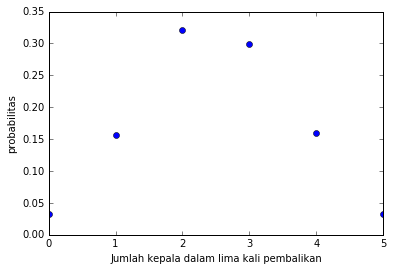

In [36]:
N = 1000
heads = -np.sum( rnd.random_integers(0,1,(5,1000))-1, axis=0 ) # Atau sebut saja ekor = 0 dan kepala = 1
countheads = np.zeros(6)
for i in range(6):
    countheads[i] = sum(heads==i)
plt.plot( list(range(0,6)), countheads/N, 'bo' )
plt.xlabel('Jumlah kepala dalam lima kali pembalikan')
plt.ylabel('probabilitas')

cumprob: [ 0.032  0.188  0.509  0.808  0.967  1.   ]


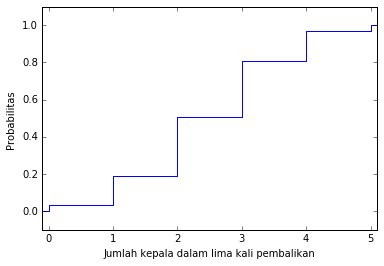

In [37]:
cumprob = np.cumsum(countheads/N)
print('cumprob:',cumprob)
y = np.hstack((0,cumprob,1))
plt.plot(np.arange(-1,7),y,drawstyle='steps-post')
plt.xlim(-0.1,5.1)
plt.ylim(-0.1,1.1)
plt.xlabel('Jumlah kepala dalam lima kali pembalikan')
plt.ylabel('Probabilitas ')

<a href="#back2">Kembali ke Latihan 2</a>

<a name="ex3answer">Kunci Jawaban Latihan 3</a>

In [38]:
from scipy.misc import comb
print('Probabilitas Teoritis: ')
for k in range(6):
    print(k,' kepala ',comb(5,k) * 0.5**k * 0.5**(5-k))
for N in (1000,10000,100000):
    heads = np.sum( rnd.random_integers(0,1,(5,N)), axis=0 )
    hitungkepala = np.zeros(6)
    for i in range(6):
        countheads[i] = np.sum(heads==i)
    print('Probabilitas dengan ',N,' percobaan ',hitungkepala / float(N))

Probabilitas Teoritis: 
0  kepala  0.03125
1  kepala  0.15625
2  kepala  0.3125
3  kepala  0.3125
4  kepala  0.15625
5  kepala  0.03125
Probabilitas dengan  1000  percobaan  [ 0.  0.  0.  0.  0.  0.]
Probabilitas dengan  10000  percobaan  [ 0.  0.  0.  0.  0.  0.]
Probabilitas dengan  100000  percobaan  [ 0.  0.  0.  0.  0.  0.]


<a href="#back3">Kembali ke Latihan 3</a>

<a name="ex4answer">Kunci Jawaban Latihan 4</a>

[ 0.02   0.1    0.249  0.42   0.678  1.   ]


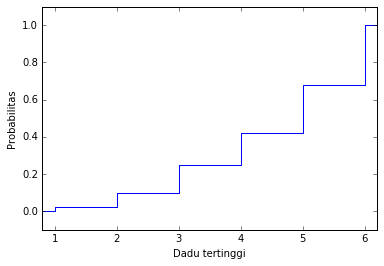

In [40]:
dice = rnd.random_integers(1,6,(2,1000))
highest_dice = np.amax(dice,0)
outcome = np.zeros(6)
for i in range(6):
    outcome[i] = np.sum(highest_dice==i+1) / float(1000)
y = np.hstack((0,np.cumsum(outcome),1))
plt.plot(list(range(0,8)),y,drawstyle='steps-post')
plt.xlim(0.8,6.2)
plt.ylim(-0.1,1.1)
print(np.cumsum(outcome))
plt.xlabel('Dadu tertinggi')
plt.ylabel('Probabilitas')

<a href="#back4">Kembali ke Latihan 4</a>

<a name="ex5answer">Kunci Jawaban Latihan 5</a>

In [41]:
for N in [1000, 10000, 100000]:
    dice = rnd.random_integers(1,6,(2,N))
    highest_dice = np.amax(dice,axis=0)
    hasil = np.zeros(6)
    for i in range(6):
        outcome[i] = np.sum(highest_dice==i+1) / float(N)
    print('Hasil dari ',N,' pelemparan: ',hasil)
# Nilai-nilai Eksak
exact = np.zeros(6)
for i,j in enumerate(range(1,12,2)):
    exact[i] = j / 36.0
print('Probabilitas eksak: ',exact)

Hasil dari  1000  pelemparan:  [ 0.  0.  0.  0.  0.  0.]
Hasil dari  10000  pelemparan:  [ 0.  0.  0.  0.  0.  0.]
Hasil dari  100000  pelemparan:  [ 0.  0.  0.  0.  0.  0.]
Probabilitas eksak:  [ 0.02777778  0.08333333  0.13888889  0.19444444  0.25        0.30555556]


<a href="#back5">Kembali ke Latihan 5</a>

<a name="ex6answer">Kunci Jawaban Latihan 6</a>

In [42]:
rnd.seed(50)
r = rnd.random_sample(1000)
votes_for_A = np.sum(r < 0.49)
print(votes_for_A)

501


In [43]:
Nlist = [1000,5000]
for N in Nlist:
    Awins = 0
    tie = 0
    for i in range(N):
        r = rnd.random_sample(N)
        if np.sum(r < 0.49) > N/2:
            Awins += 1
        elif np.sum(r < 0.49) == N/2:
            tie += 1
    print('Jumlah responden dalam polling: ',N)
    print('Probabilitas kandidat A menang berdasarkan prediksi: ',Awins/float(N))
    print('Probabilitas polling memprediksi hasil seri: ',tie/float(N))

Jumlah responden dalam polling:  1000
Probabilitas kandidat A menang berdasarkan prediksi:  0.268
Probabilitas polling memprediksi hasil seri:  0.024
Jumlah responden dalam polling:  5000
Probabilitas kandidat A menang berdasarkan prediksi:  0.0752
Probabilitas polling memprediksi hasil seri:  0.0046


<a href="#back6">Kembali ke Latihan 6</a>